# Applied Data Science Capstone (Seattle City Car Accident Analysis)

### This is the last assignment to fullfill the professional certificate requirements

# Car Accident in Seattle City

# Introduction
In an attempt to build a model that can predict the accident, an algorithm was developed. The aim of the model is to interpret the severity of a car collision in Seattle city. Herein several parameters were employed, such as weather, road, and visibility condition, to predict the accident severity. Undoubtedly, the weather condition somehow has an influence on the number of collisions (for example a rainy day with high speed could cause the car to drift leading to an accident). The success of the project will help individuals to be more careful when one of the parameters changes. In the long term, the project can help governmental organizations, car insurance companies and medical insurance companies to provide solutions based on the prediction of the collision rate (i.e. collisions per year) and the severity code (prop damage or injury). 

# Data Description
The data used in this project are the collisions for all years of seattle city, and it is provided below. The data include a vast number of attributes. To build a model the data was shortened and divided into two categories. The first category comprises of the independent variables which are Road condition, light-condition and weather. The second category is the dependent variable or the predictor which is the severity code. The numbers in the severity code are indications that were put to assess the severity of an accident. The number 1 refers to prop damage while 2 referring to injury.

### More description of the data
1. OBJECTID: Unique identifier
2. X: Coordinates
3. Y: Coordinates
4. LOCATION: Coordinates
3. COLLISIONTYPE: Collision type
4. PERSONCOUNT: The number of pedestrians involved in the collision. This is entered by the state.
5. UNDERINFL: Whether or not a driver involved was under the influence of drugs or alcohol.
6. WEATHER: A description of the weather conditions during the time of the collision.
7. ROADCOND: The condition of the road during the collision.
8. LIGHTCOND: The light conditions during the collision.
9. SPEEDING: Whether speeding was a factor in the collision or not. (Y/N)  
10. SEVERITYCODE: A code that corresponds to the severity of the collision where 1 refers to prop damage and 2 refers to injury

# Data visualization and pre-processing
In this section the data are going to be pre-processed, investigated and analyzed comprehensively. This step is necessary for Machine Learning (ML) modeling

In [1]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


In [3]:
# Uncomment this to give you the current directory we are currently at
#pwd

In [4]:
import itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
import os
%matplotlib inline

In [5]:
## Read the CSV file
df = pd.read_csv('Data-Collisions.csv')
df.head()

C:\Users\Engma\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [6]:
## The shape of the data frame
df.shape

(194673, 38)

In [7]:
## The count number of each group in SEVERITYCODE column where,
#A code that corresponds to the severity of the collision:
#• 3—fatality
#• 2b—serious injury
#• 2—injury
#• 1—prop damage
#• 0—unknown

##The data unbalanced, 1 is higher than 2 with 2.4 times
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [8]:
## Select some attributes and attach it to a variable named features
df[['OBJECTID','X','Y','LOCATION','COLLISIONTYPE','PERSONCOUNT','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','SPEEDING','SEVERITYCODE']]
features = df[['OBJECTID','X','Y','LOCATION','COLLISIONTYPE','PERSONCOUNT','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','SPEEDING','SEVERITYCODE']]
features.head()

,OBJECTID,X,Y,LOCATION,COLLISIONTYPE,PERSONCOUNT,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,SEVERITYCODE
0,1,-122.323148,47.703140,5TH AVE NE AND NE 103RD ST,Angles,2,N,Overcast,Wet,Daylight,NaN,2
1,2,-122.347294,47.647172,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Sideswipe,2,0,Raining,Wet,Dark - Street Lights On,NaN,1
2,3,-122.334540,47.607871,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Parked Car,4,0,Overcast,Dry,Daylight,NaN,1
3,4,-122.334803,47.604803,2ND AVE BETWEEN MARION ST AND MADISON ST,Other,3,N,Clear,Dry,Daylight,NaN,1
4,5,-122.306426,47.545739,SWIFT AVE S AND SWIFT AV OFF RP,Angles,2,0,Raining,Wet,Daylight,NaN,2


In [9]:
##Balance the unbalanced data to avoid bias ML model
from sklearn.utils import resample

n=58188

features_cl1 = features[features.SEVERITYCODE==1]
features_cl2 = features[features.SEVERITYCODE==2]

features_dsample = resample(features_cl1,
                           replace=False,
                           n_samples=n,
                           random_state=123)
features_balanced = pd.concat([features_dsample, features_cl2])
features_balanced.SEVERITYCODE.value_counts()
features_balanced.head()

,OBJECTID,X,Y,LOCATION,COLLISIONTYPE,PERSONCOUNT,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,SEVERITYCODE
25055,29626,-122.292730,47.719265,33RD AVE NE AND NE 125TH ST,Angles,2,0,Raining,Wet,Dark - Street Lights On,NaN,1
65280,71557,-122.329124,47.608658,8TH AVE AND SPRING ST,Angles,2,0,Clear,Dry,Daylight,NaN,1
86292,94574,-122.292434,47.733753,LAKE CITY WAY NE AND NE 145TH ST,Angles,2,N,Unknown,Unknown,Unknown,NaN,1
155111,172907,NaN,NaN,ALASKAN WY VI NB BETWEEN SENECA ST OFF RP AND ...,Sideswipe,2,N,Clear,Dry,Daylight,NaN,1
64598,70842,-122.339185,47.625594,ROY ST BETWEEN 9TH AVE N AND VALLEY ST,Head On,3,0,Clear,Dry,Daylight,NaN,1


In [10]:
## Investigate some of the attributes
features['ROADCOND'].value_counts()
#features['WEATHER'].value_counts()
#features['UNDERINFL'].value_counts()
#features['LIGHTCOND'].value_counts()
#features['SEVERITYCODE'].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [11]:
##Type and shape of data in the data frames (features, balanced features) and
print(features.dtypes)
print(features_balanced.dtypes)
print(features.shape)
print(features_balanced.shape)

OBJECTID           int64
X                float64
Y                float64
LOCATION          object
COLLISIONTYPE     object
PERSONCOUNT        int64
UNDERINFL         object
WEATHER           object
ROADCOND          object
LIGHTCOND         object
SPEEDING          object
SEVERITYCODE       int64
dtype: object
OBJECTID           int64
X                float64
Y                float64
LOCATION          object
COLLISIONTYPE     object
PERSONCOUNT        int64
UNDERINFL         object
WEATHER           object
ROADCOND          object
LIGHTCOND         object
SPEEDING          object
SEVERITYCODE       int64
dtype: object
(194673, 12)
(116376, 12)


In [12]:
!conda install -c anaconda seaborn -y

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Engma\Anaconda3

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1h             |       he774522_0         5.8 MB  anaconda
    ------------------------------------------------------------
                                           Total:         5.8 MB

The following packages will be UPDATED:

  ca-certificates    conda-forge::ca-certificates-2020.6.2~ --> anaconda::ca-certificates-2020.7.22-0

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi            conda-forge::certifi-2020.6.20-py37hc~ --> anaconda::certifi-2020.6.20-py37_0
  conda              conda-forge::conda-4.8.5-py37hc8dfbb8~ --> anaconda::conda-4.8.5-py37_0
  openssl                                       conda-forge --> anaconda




openssl-1.1.

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename C:\Users\Engma\Anaconda3\pkgs\openssl-1.1.1h-he774522_0\Library\bin\libcrypto-1_1-x64.dll.conda_trash.conda_trash.conda_trash.conda_trash.conda_trash.conda_trash.conda_trash.conda_trash.conda_trash.conda_trash.conda_trash.conda_trash.conda_trash.conda_trash.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename C:\Users\Engma\Anaconda3\pkgs\openssl-1.1.1h-he774522_0.tar.bz2.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename C:\Users\Engma\Anaconda3\pkgs\openssl-1.1.1h-he774522_0\Library\bin\libcrypto-1_1-x64.dll.conda_trash.conda_trash.conda_trash.conda_trash.conda_trash.conda_trash.conda_trash.conda_trash.conda_trash.conda_trash.conda_trash.conda_trash.

openssl-1.1.1h       | 5.8 MB    | #######9   |  80% 
openssl-1.1.1h       | 5.8 MB    | ########2  |  83% 
openssl-1.1.1h       | 5.8 MB    | ########4  |  84% 
openssl-1.1.1h       | 5.8 MB    | ########8  |  88% 
openssl-1.1.1h       | 5.8 MB    | ########9  |  90% 
openssl-1.1.1h       | 5.8 MB    | #########2 |  92% 
openssl-1.1.1h       | 5.8 MB    | #########4 |  94% 
openssl-1.1.1h       | 5.8 MB    | #########6 |  97% 
openssl-1.1.1h       | 5.8 MB    | #########9 |  99% 
openssl-1.1.1h       | 5.8 MB    | ########## | 100% 


In [13]:
print(features_balanced.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116376 entries, 25055 to 194671
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   OBJECTID       116376 non-null  int64  
 1   X              113462 non-null  float64
 2   Y              113462 non-null  float64
 3   LOCATION       115071 non-null  object 
 4   COLLISIONTYPE  113666 non-null  object 
 5   PERSONCOUNT    116376 non-null  int64  
 6   UNDERINFL      113683 non-null  object 
 7   WEATHER        113560 non-null  object 
 8   ROADCOND       113612 non-null  object 
 9   LIGHTCOND      113528 non-null  object 
 10  SPEEDING       5980 non-null    object 
 11  SEVERITYCODE   116376 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 11.5+ MB
None


In [14]:
# check point
print(features_balanced.shape)
print(features_balanced['SEVERITYCODE'].value_counts())

(116376, 12)
2    58188
1    58188
Name: SEVERITYCODE, dtype: int64


In [15]:
# Columns in features_balanced data frame
features_balanced.columns.values 

array(['OBJECTID', 'X', 'Y', 'LOCATION', 'COLLISIONTYPE', 'PERSONCOUNT',
       'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING',
       'SEVERITYCODE'], dtype=object)

In [16]:
#Type of column's topic to ensure no problem occur during the analysis
[print (type(x)) for x in features_balanced.columns.values]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


[None, None, None, None, None, None, None, None, None, None, None, None]

In [17]:

import numpy as np

# replace "?" to NaN
features_balanced.replace("?", np.nan, inplace = True)
features_balanced.head(5)

,OBJECTID,X,Y,LOCATION,COLLISIONTYPE,PERSONCOUNT,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,SEVERITYCODE
25055,29626,-122.292730,47.719265,33RD AVE NE AND NE 125TH ST,Angles,2,0,Raining,Wet,Dark - Street Lights On,NaN,1
65280,71557,-122.329124,47.608658,8TH AVE AND SPRING ST,Angles,2,0,Clear,Dry,Daylight,NaN,1
86292,94574,-122.292434,47.733753,LAKE CITY WAY NE AND NE 145TH ST,Angles,2,N,Unknown,Unknown,Unknown,NaN,1
155111,172907,NaN,NaN,ALASKAN WY VI NB BETWEEN SENECA ST OFF RP AND ...,Sideswipe,2,N,Clear,Dry,Daylight,NaN,1
64598,70842,-122.339185,47.625594,ROY ST BETWEEN 9TH AVE N AND VALLEY ST,Head On,3,0,Clear,Dry,Daylight,NaN,1


Identify_missing_values

<h4>Evaluating for Missing Data</h4>

The missing values are converted to Python's default. We use Python's built-in functions to identify these missing values. There are two methods to detect missing data:
<ol>
    <li><b>.isnull()</b></li>
    <li><b>.notnull()</b></li>
</ol>
The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.

"True" stands for missing value, while "False" stands for not missing value.

In [18]:
missing_data = features_balanced.isnull()
missing_data.head(5)

,OBJECTID,X,Y,LOCATION,COLLISIONTYPE,PERSONCOUNT,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,SEVERITYCODE
25055,False,False,False,False,False,False,False,False,False,False,True,False
65280,False,False,False,False,False,False,False,False,False,False,True,False
86292,False,False,False,False,False,False,False,False,False,False,True,False
155111,False,True,True,False,False,False,False,False,False,False,True,False
64598,False,False,False,False,False,False,False,False,False,False,True,False


<h4>Count missing values in each column</h4>
<p>
Using a for loop in Python, we can quickly figure out the number of missing values in each column. As mentioned above, "True" represents a missing value, "False"  means the value is present in the dataset.  In the body of the for loop the method  ".value_counts()"  counts the number of "True" values. 
</p>

In [19]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

OBJECTID
False    116376
Name: OBJECTID, dtype: int64

X
False    113462
True       2914
Name: X, dtype: int64

Y
False    113462
True       2914
Name: Y, dtype: int64

LOCATION
False    115071
True       1305
Name: LOCATION, dtype: int64

COLLISIONTYPE
False    113666
True       2710
Name: COLLISIONTYPE, dtype: int64

PERSONCOUNT
False    116376
Name: PERSONCOUNT, dtype: int64

UNDERINFL
False    113683
True       2693
Name: UNDERINFL, dtype: int64

WEATHER
False    113560
True       2816
Name: WEATHER, dtype: int64

ROADCOND
False    113612
True       2764
Name: ROADCOND, dtype: int64

LIGHTCOND
False    113528
True       2848
Name: LIGHTCOND, dtype: int64

SPEEDING
True     110396
False      5980
Name: SPEEDING, dtype: int64

SEVERITYCODE
False    116376
Name: SEVERITYCODE, dtype: int64



### Based on the summary above, each column has 116376 rows of data, nine columns containing missing data:
<ol>
    <li>"X":              2914 missing data</li>
    <li>"Y":              2914 missing data</li>
    <li>"LOCATION":       1305 missing data</li>
    <li>"COLLISIONTYPE" : 2710 missing data</li>
    <li>"UNDERINFL":      2693 missing data</li>
    <li>"WEATHER":        2816 missing data</li>
    <li>"ROADCOND":       2764 missing data</li>
    <li>"LIGHTCOND":      2848 missing data</li>
    <li>"SPEEDING":       110396 missing data</li>
</ol>

In [20]:
# simply drop whole row with NaN in "SPEEDING" column
features_balanced.dropna(subset=["SPEEDING", "LIGHTCOND", "ROADCOND", "WEATHER", "UNDERINFL", "COLLISIONTYPE", "X", "Y", "LOCATION"], axis=0, inplace=True)

# reset index, because we droped rows
features_balanced.reset_index(drop=True, inplace=True)

In [21]:
features_balanced.shape

(5600, 12)

In [22]:
#Check missing data again
missing_data = features_balanced.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

OBJECTID
False    5600
Name: OBJECTID, dtype: int64

X
False    5600
Name: X, dtype: int64

Y
False    5600
Name: Y, dtype: int64

LOCATION
False    5600
Name: LOCATION, dtype: int64

COLLISIONTYPE
False    5600
Name: COLLISIONTYPE, dtype: int64

PERSONCOUNT
False    5600
Name: PERSONCOUNT, dtype: int64

UNDERINFL
False    5600
Name: UNDERINFL, dtype: int64

WEATHER
False    5600
Name: WEATHER, dtype: int64

ROADCOND
False    5600
Name: ROADCOND, dtype: int64

LIGHTCOND
False    5600
Name: LIGHTCOND, dtype: int64

SPEEDING
False    5600
Name: SPEEDING, dtype: int64

SEVERITYCODE
False    5600
Name: SEVERITYCODE, dtype: int64



### Based on the summary above, columns were reduced to 5600 rows of data, and non of the columns contains missing data

In [23]:
# Check the data balance again

features_balanced['SEVERITYCODE'].value_counts()

2    3319
1    2281
Name: SEVERITYCODE, dtype: int64

In [24]:
# Balance the data again

##Balance the unbalanced data to avoid bias ML model
from sklearn.utils import resample

n=2281

features_balanced_cl3 = features_balanced[features_balanced.SEVERITYCODE==1]
features_balanced_cl4 = features_balanced[features_balanced.SEVERITYCODE==2]

features_dsample = resample(features_balanced_cl4,
                           replace=False,
                           n_samples=n,
                           random_state=123)
features_balanced_1 = pd.concat([features_dsample, features_balanced_cl3])
features_balanced_1.SEVERITYCODE.value_counts()
features_balanced_1.head()

,OBJECTID,X,Y,LOCATION,COLLISIONTYPE,PERSONCOUNT,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,SEVERITYCODE
4222,108957,-122.320760,47.611169,BROADWAY AND MADISON ST,Angles,3,N,Clear,Dry,Daylight,Y,2
4772,146119,-122.333450,47.546641,EAST MARGINAL WAY S BETWEEN 1ST AV S BR NB AND...,Rear Ended,6,N,Clear,Dry,Daylight,Y,2
3017,44860,-122.307202,47.543604,S CORGIAT DR BETWEEN URSULA PL S AND CORGIAT DR S,Other,1,1,Clear,Dry,Dark - No Street Lights,Y,2
5271,192417,-122.329554,47.734100,N 145TH ST BETWEEN SUNNYSIDE AVE N AND 1ST AVE NE,Rear Ended,4,N,Raining,Wet,Dawn,Y,2
4725,142762,-122.368082,47.568339,28TH AVE SW AND SW ANDOVER ST,Head On,3,N,Overcast,Wet,Dark - Street Lights On,Y,2


In [25]:
# Check the data balance again

features_balanced_1['SEVERITYCODE'].value_counts()

2    2281
1    2281
Name: SEVERITYCODE, dtype: int64

In [26]:
# Check speeding
features_balanced_1['SPEEDING'].value_counts()

Y    4562
Name: SPEEDING, dtype: int64

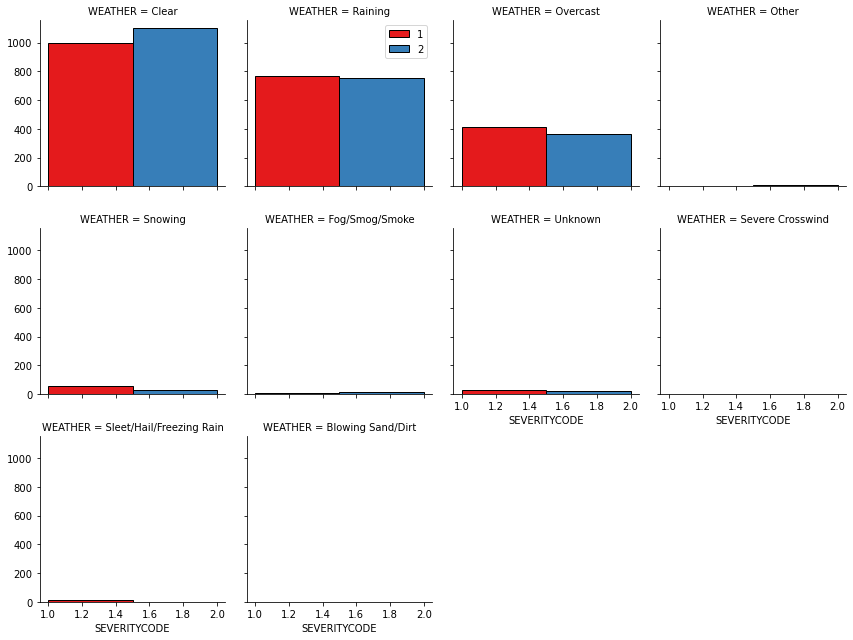

In [27]:
## Now lets visualize the data with respect to weather
import seaborn as sns

bins = np.linspace(features_balanced_1.SEVERITYCODE.min(), features_balanced_1.SEVERITYCODE.max(), 3)
g = sns.FacetGrid(features_balanced_1, col="WEATHER", hue="SEVERITYCODE", palette="Set1", col_wrap=4)
g.map(plt.hist, 'SEVERITYCODE', bins=bins, ec="k")

g.axes[1].legend()
plt.show()

It is clear from the figures that the clear raining and overcast weather are the main contributer to the increased number of the care accident.

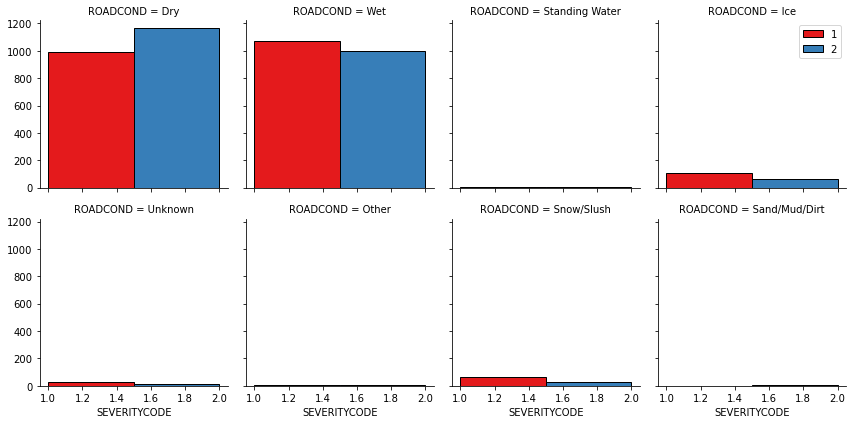

In [28]:
## Now lets visualize the data with respect to ROADCOND
import seaborn as sns

bins = np.linspace(features_balanced_1.SEVERITYCODE.min(), features_balanced_1.SEVERITYCODE.max(), 3)
g = sns.FacetGrid(features_balanced_1, col="ROADCOND", hue="SEVERITYCODE", palette="Set1", col_wrap=4)
g.map(plt.hist, 'SEVERITYCODE', bins=bins, ec="k")

g.axes[3].legend()
plt.show()

The condition of the road was visualized. The outcomes shows that the dry and wet were the main contributors.

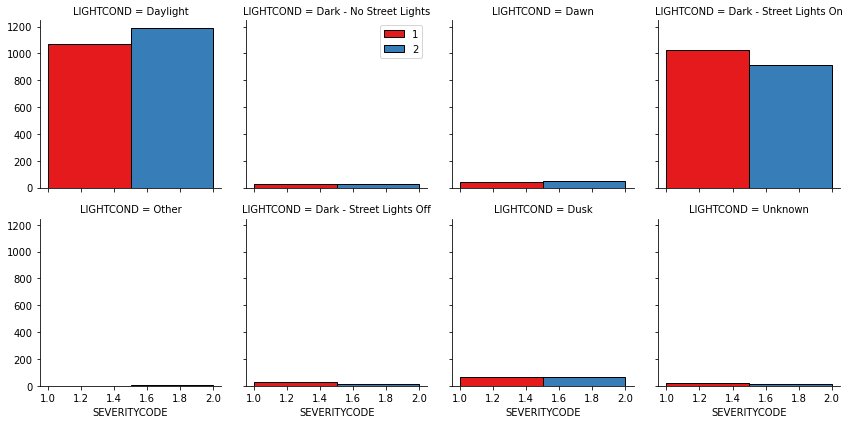

In [29]:
## Now lets visualize the data with respect to LIGHTCOND
import seaborn as sns

bins = np.linspace(features_balanced_1.SEVERITYCODE.min(), features_balanced_1.SEVERITYCODE.max(), 3)
g = sns.FacetGrid(features_balanced_1, col="LIGHTCOND", hue="SEVERITYCODE", palette="Set1", col_wrap=4)
g.map(plt.hist, 'SEVERITYCODE', bins=bins, ec="k")

g.axes[1].legend()
plt.show()

In [30]:
## Lets assume 0 and 1 are no and yes, respectively, in UNDERINFL feature
## convert all Y, yes to 1 and No, N to 0 (convert values to numerical)

features_balanced_1['UNDERINFL'].replace(to_replace=['1','0'], value=['Y','N'],inplace=True)
features_balanced_1['UNDERINFL'].replace(to_replace=['Yes','No'], value=['Y','N'],inplace=True)
features_balanced_1['UNDERINFL'].replace(to_replace=['Y','N'], value=[1,0],inplace=True)
features_balanced_1.head()

,OBJECTID,X,Y,LOCATION,COLLISIONTYPE,PERSONCOUNT,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,SEVERITYCODE
4222,108957,-122.320760,47.611169,BROADWAY AND MADISON ST,Angles,3,0,Clear,Dry,Daylight,Y,2
4772,146119,-122.333450,47.546641,EAST MARGINAL WAY S BETWEEN 1ST AV S BR NB AND...,Rear Ended,6,0,Clear,Dry,Daylight,Y,2
3017,44860,-122.307202,47.543604,S CORGIAT DR BETWEEN URSULA PL S AND CORGIAT DR S,Other,1,1,Clear,Dry,Dark - No Street Lights,Y,2
5271,192417,-122.329554,47.734100,N 145TH ST BETWEEN SUNNYSIDE AVE N AND 1ST AVE NE,Rear Ended,4,0,Raining,Wet,Dawn,Y,2
4725,142762,-122.368082,47.568339,28TH AVE SW AND SW ANDOVER ST,Head On,3,0,Overcast,Wet,Dark - Street Lights On,Y,2


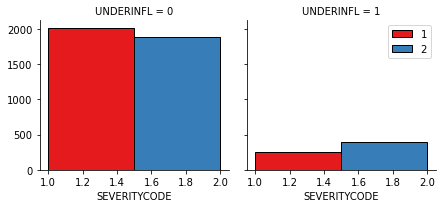

In [31]:
## Now lets visualize the data with respect to UNDERINFL
import seaborn as sns

bins = np.linspace(features_balanced_1.SEVERITYCODE.min(), features_balanced_1.SEVERITYCODE.max(), 3)
g = sns.FacetGrid(features_balanced_1, col="UNDERINFL", hue="SEVERITYCODE", palette="Set1", col_wrap=4)
g.map(plt.hist, 'SEVERITYCODE', bins=bins, ec="k")

g.axes[1].legend()
plt.show()

In [32]:
## Drop unnecessary data

features_balanced_2 = features_balanced_1[['OBJECTID','COLLISIONTYPE', 'UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','SPEEDING','SEVERITYCODE']]

##Convert SPEEDING values to numerical
features_balanced_2['SPEEDING'].replace(to_replace=['Y'], value=[1],inplace=True)
features_balanced_2.head()

C:\Users\Engma\Anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,OBJECTID,COLLISIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,SEVERITYCODE
4222,108957,Angles,0,Clear,Dry,Daylight,1,2
4772,146119,Rear Ended,0,Clear,Dry,Daylight,1,2
3017,44860,Other,1,Clear,Dry,Dark - No Street Lights,1,2
5271,192417,Rear Ended,0,Raining,Wet,Dawn,1,2
4725,142762,Head On,0,Overcast,Wet,Dark - Street Lights On,1,2


## Convert Categorical features to numerical values for the rest of the features

Let's look at weather:

In [33]:
features_balanced_2.groupby(['WEATHER'])['SEVERITYCODE'].value_counts(normalize=True)

WEATHER                   SEVERITYCODE
Blowing Sand/Dirt         1               1.000000
Clear                     2               0.525084
                          1               0.474916
Fog/Smog/Smoke            2               0.615385
                          1               0.384615
Other                     2               0.600000
                          1               0.400000
Overcast                  1               0.533505
                          2               0.466495
Raining                   1               0.504624
                          2               0.495376
Severe Crosswind          2               1.000000
Sleet/Hail/Freezing Rain  1               1.000000
Snowing                   1               0.650602
                          2               0.349398
Unknown                   1               0.617021
                          2               0.382979
Name: SEVERITYCODE, dtype: float64

Among the major three contributor (Clear, overcast and raining) in weather:
52% of the collisions were in clear day which indicated to two in SEVERITYCODE (2=injury), 53% of the collisions were in overcast day which indicated to one in SEVERITYCODE (1=prop-damage) and 50% of the collisions were in raining day which indicated to one in SEVERITYCODE (1=prop-damage)

In [34]:
features_balanced_2.groupby(['ROADCOND'])['SEVERITYCODE'].value_counts(normalize=True)

ROADCOND        SEVERITYCODE
Dry             2               0.540390
                1               0.459610
Ice             1               0.625000
                2               0.375000
Other           1               0.600000
                2               0.400000
Sand/Mud/Dirt   2               0.714286
                1               0.285714
Snow/Slush      1               0.703297
                2               0.296703
Standing Water  1               0.615385
                2               0.384615
Unknown         1               0.729730
                2               0.270270
Wet             1               0.517641
                2               0.482359
Name: SEVERITYCODE, dtype: float64

Among the major two contributors (wet and dry) in ROADCOND:
The SEVERITYCODE registered two (2=injury) for dry road with a 54% while one (1=prob-damage) for wet road with 51%

In [35]:
features_balanced_2.groupby(['LIGHTCOND'])['SEVERITYCODE'].value_counts(normalize=True)

LIGHTCOND                 SEVERITYCODE
Dark - No Street Lights   1               0.516667
                          2               0.483333
Dark - Street Lights Off  1               0.627907
                          2               0.372093
Dark - Street Lights On   1               0.528321
                          2               0.471679
Dawn                      2               0.540230
                          1               0.459770
Daylight                  2               0.526386
                          1               0.473614
Dusk                      2               0.515152
                          1               0.484848
Other                     2               0.800000
                          1               0.200000
Unknown                   1               0.631579
                          2               0.368421
Name: SEVERITYCODE, dtype: float64

Among the major two contributors (Dark - Street Lights On  and Daylight) in LIGHTCOND:
The SEVERITYCODE registered two (2=injury) for Daylight with a 52% while one (1=prob-damage) for Dark - Street Lights On with 53%

### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [36]:
features_balanced_3 = features_balanced_2[['WEATHER','ROADCOND','LIGHTCOND','UNDERINFL']]
features_balanced_3 = pd.concat([features_balanced_3,pd.get_dummies(features_balanced_2['WEATHER'])], axis=1)
#features_balanced_3.drop(['Blowing Sand/Dirt','Fog/Smog/Smoke','Other','Severe Crosswind','Sleet/Hail/Freezing Rain','Snowing','Unknown'], axis = 1,inplace=True)
features_balanced_3.head()

,WEATHER,ROADCOND,LIGHTCOND,UNDERINFL,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other,Overcast,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Unknown
4222,Clear,Dry,Daylight,0,0,1,0,0,0,0,0,0,0,0
4772,Clear,Dry,Daylight,0,0,1,0,0,0,0,0,0,0,0
3017,Clear,Dry,Dark - No Street Lights,1,0,1,0,0,0,0,0,0,0,0
5271,Raining,Wet,Dawn,0,0,0,0,0,0,1,0,0,0,0
4725,Overcast,Wet,Dark - Street Lights On,0,0,0,0,0,1,0,0,0,0,0


In [37]:
features_balanced_3 = pd.concat([features_balanced_3,pd.get_dummies(features_balanced_2['LIGHTCOND'])], axis=1)
#features_balanced_3.drop(['Dark - No Street Lights','Dark - Street Lights Off','Dawn','Dusk','Other','Unknown'], axis = 1,inplace=True)
features_balanced_3.head()

,WEATHER,ROADCOND,LIGHTCOND,UNDERINFL,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other,Overcast,Raining,...,Snowing,Unknown,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dawn,Daylight,Dusk,Other,Unknown
4222,Clear,Dry,Daylight,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4772,Clear,Dry,Daylight,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3017,Clear,Dry,Dark - No Street Lights,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5271,Raining,Wet,Dawn,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4725,Overcast,Wet,Dark - Street Lights On,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [38]:
features_balanced_3 = pd.concat([features_balanced_3,pd.get_dummies(features_balanced_2['ROADCOND'])], axis=1)
#features_balanced_3.drop(['Dark - No Street Lights','Dark - Street Lights Off','Dawn','Dusk','Other','Unknown'], axis = 1,inplace=True)
features_balanced_3.head()

,WEATHER,ROADCOND,LIGHTCOND,UNDERINFL,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other,Overcast,Raining,...,Other,Unknown,Dry,Ice,Other,Sand/Mud/Dirt,Snow/Slush,Standing Water,Unknown,Wet
4222,Clear,Dry,Daylight,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4772,Clear,Dry,Daylight,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3017,Clear,Dry,Dark - No Street Lights,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5271,Raining,Wet,Dawn,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4725,Overcast,Wet,Dark - Street Lights On,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [39]:
features_balanced_3.drop(['WEATHER','ROADCOND','LIGHTCOND'], axis = 1,inplace=True)
features_balanced_3.head()

,UNDERINFL,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other,Overcast,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,...,Other,Unknown,Dry,Ice,Other,Sand/Mud/Dirt,Snow/Slush,Standing Water,Unknown,Wet
4222,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4772,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3017,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5271,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4725,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Now the data are balanced and ready for the analysis

# METHODOLOGY

The data are cleaned and ready to be used in a machine learning model. There are several models will be tested as follows:
1. K-Nearest Neighbor (KNN)
2. Logistic Regression
3. SVM

## Now let's start with KNN

In [40]:
X = features_balanced_3
X[0:5]

,UNDERINFL,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other,Overcast,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,...,Other,Unknown,Dry,Ice,Other,Sand/Mud/Dirt,Snow/Slush,Standing Water,Unknown,Wet
4222,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4772,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3017,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5271,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4725,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [41]:
y = features_balanced_2['SEVERITYCODE'].values
y[0:5]

array([2, 2, 2, 2, 2], dtype=int64)

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (3649, 27) (3649,)
Test set: (913, 27) (913,)


In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.52354874, 0.50492881, 0.49835706, 0.50273823, 0.52354874,
       0.53012048, 0.50711939, 0.50711939, 0.51150055])

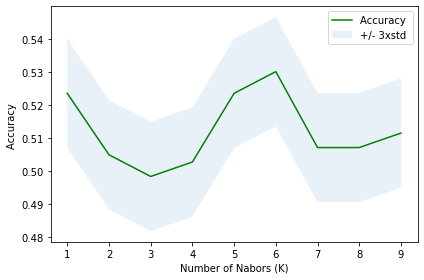

The best accuracy was with 0.5301204819277109 with k= 6


In [44]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

# SVM

In [59]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

Train set: (3649, 27) (3649,)
Test set: (913, 27) (913,)


C:\Users\Engma\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [60]:
yhat1 = clf.predict(X_test)
yhat1 [0:5]

array([2, 2, 1, 2, 1], dtype=int64)

              precision    recall  f1-score   support

           1       0.52      0.48      0.50       462
           2       0.51      0.55      0.53       451

   micro avg       0.51      0.51      0.51       913
   macro avg       0.52      0.52      0.51       913
weighted avg       0.52      0.51      0.51       913

Confusion matrix, without normalization
[[224 238]
 [205 246]]


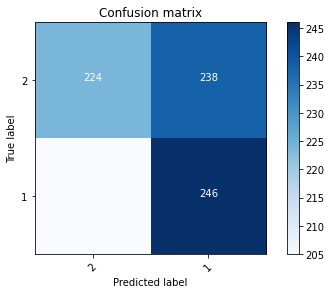

In [61]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    # Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat1)
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat1))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=features_balanced_2['SEVERITYCODE'].unique().tolist(),normalize= False,  title='Confusion matrix')

# Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [63]:
yhat2 = LR.predict(X_test)
yhat2

array([2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2,
       2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2,
       2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1,
       2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2,
       2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2,
       1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1,
       2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2,
       1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1,

In [64]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.44, 0.56],
       [0.44, 0.56],
       [0.5 , 0.5 ],
       ...,
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.53, 0.47]])

In [65]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat2)
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6912541423423092

# Model Evaluation using Test set

In [66]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [67]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]
Y = features_balanced_2['SEVERITYCODE'].values
Y[0:5]

C:\Users\Engma\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Engma\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


array([2, 2, 2, 2, 2], dtype=int64)

In [68]:
yhatKNN=neigh.predict(X)
KNNJaccard = jaccard_similarity_score(y, yhatKNN)
KNNF1 = f1_score(y, yhatKNN, average='weighted')
print("KNNAvg F1-score: %.2f" % KNNF1 )
print("KNN Jaccard Score: %.2f" % KNNJaccard)


#yhatDEC = loneTree.predict(X)
#DTJaccard = jaccard_similarity_score(y, yhatDEC)
#DTF1 = f1_score(y, yhatDEC, average='weighted')
#print("Decision Tree Avg F1-score: %.2f" % DTF1 )
#print("Decision Tree Jaccard Score: %.2f" % DTJaccard)

yhatSVM=clf.predict(X)
SVMJaccard = jaccard_similarity_score(y, yhatSVM)
SVMF1 = f1_score(y, yhatSVM, average='weighted')
print("SVM Avg F1-score: %.2f" % SVMF1)
print("SVM Jaccard score: %.2f" % SVMJaccard)

yhatLOG = LR.predict(X)
yhatLOGproba = LR.predict_proba(X)
LogRJaccard = jaccard_similarity_score(y, yhatLOG)
LogRF1 = f1_score(y, yhatLOG, average='weighted')
Logloss = log_loss(y, yhatLOGproba)
print("LogLoss: : %.2f" % Logloss)
print("LOGR Avg F1-score: %.4f" % LogRF1)
print("LOGR Jaccard score: %.4f" % LogRJaccard)

KNNAvg F1-score: 0.52
KNN Jaccard Score: 0.53
SVM Avg F1-score: 0.55
SVM Jaccard score: 0.56
LogLoss: : 0.69
LOGR Avg F1-score: 0.5506
LOGR Jaccard score: 0.5568


# Report

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 0.53    | 0.52     | NA      |
| SVM                | 0.56    | 0.55     | NA      |
| LogisticRegression | 0.5568  | 0.5506   | 0.69    |

# Thank you!